In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

salary = [11, 40, 45, 68, 65, 68, 78, 90, 57, 74, 91, 92, 88, 68, 57, 48, 99, 101, 68, 77, 110, 140]

In [7]:
df = pd.DataFrame(salary, columns = ['Salary'])
df

,Salary
0,11
1,40
2,45
3,68
4,65
5,68
6,78
7,90
8,57
9,74


Text(0.5, 1.0, 'Box plot')

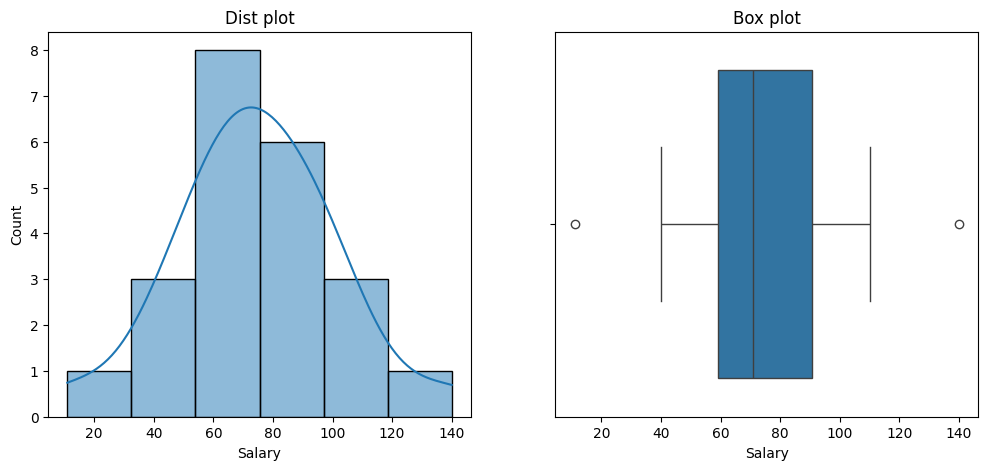

In [4]:
#To check outlier >> distplot, boxplot


plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Salary'], kde = True)
plt.title("Dist plot")

plt.subplot(1, 2, 2)
sns.boxplot(data =df, x = 'Salary')
plt.title("Box plot")

# DROP OUTLIER

In [5]:
Q1=df["Salary"].quantile(0.25)
Q3=df["Salary"].quantile(0.75)
IQR=Q3-Q1
lower=Q1-IQR*1.5
upper=Q3+IQR*1.5

In [6]:
dfNew=df[(df.Salary>=lower) & (df.Salary<=upper)]
dfNew

,Salary
1,40
2,45
3,68
4,65
5,68
6,78
7,90
8,57
9,74
10,91


In [8]:
dfNew.shape

(20, 1)

{'whiskers': [<matplotlib.lines.Line2D at 0x248b57d0b90>,
 'caps': [<matplotlib.lines.Line2D at 0x248b5924200>,
 'boxes': [<matplotlib.lines.Line2D at 0x248b57d2720>],
 'medians': [<matplotlib.lines.Line2D at 0x248b59247a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x248b5924a40>],
 'means': []}

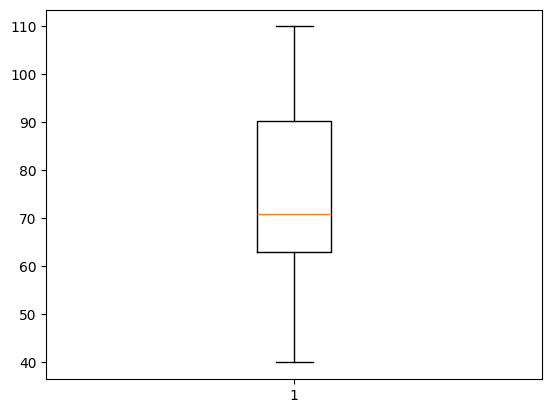

In [9]:
plt.boxplot(data=dfNew,x="Salary")

# REPLACE ITH MEAN AND MEDIAN

In [10]:
df["Salary_imputedMean"]=np.where((df.Salary<=lower)|(df.Salary >=upper),df["Salary"].mean,df["Salary"])

In [13]:
df

,Salary,Salary_imputedMean
0,11,<bound method Series.mean of 0 11\n1 ...
1,40,40
2,45,45
3,68,68
4,65,65
5,68,68
6,78,78
7,90,90
8,57,57
9,74,74


{'whiskers': [<matplotlib.lines.Line2D at 0x248b7cd66c0>,
 'caps': [<matplotlib.lines.Line2D at 0x248b7cd60c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x248b7cd6960>],
 'medians': [<matplotlib.lines.Line2D at 0x248b7514cb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x248b7cceb40>],
 'means': []}

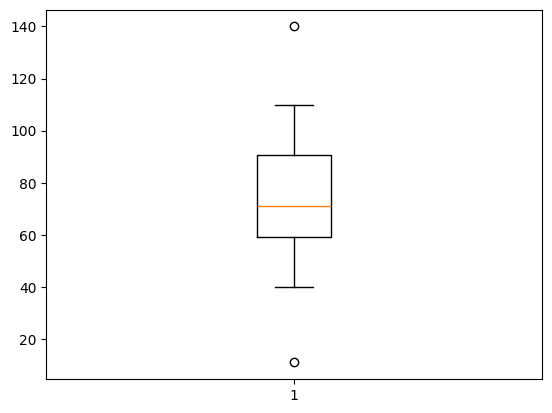

In [17]:
plt.boxplot(data=df,x="Salary")

# CAPPING

In [19]:
lowerCap=df.Salary.quantile(.5)
upperCap=df.Salary.quantile(.95)

In [21]:
df["capped"]=np.where(df.Salary<lowerCap,lowerCap,np.where(df.Salary>upperCap,upperCap ,df.Salary))

In [22]:
df

,Salary,Salary_imputedMean,capped
0,11,<bound method Series.mean of 0 11\n1 ...,71.00
1,40,40,71.00
2,45,45,71.00
3,68,68,71.00
4,65,65,71.00
5,68,68,71.00
6,78,78,78.00
7,90,90,90.00
8,57,57,71.00
9,74,74,74.00


Text(0.5, 1.0, 'Box plot')

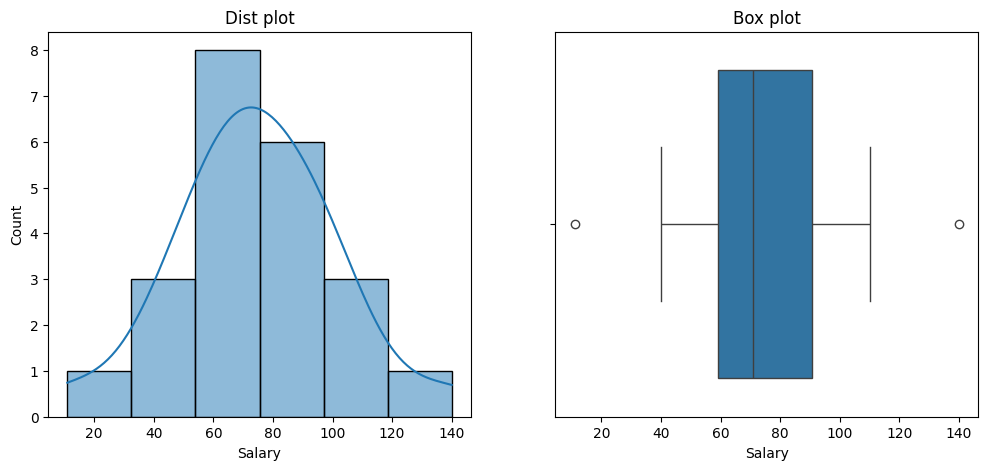

In [23]:


plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Salary'], kde = True)
plt.title("Dist plot")

plt.subplot(1, 2, 2)
sns.boxplot(data =df, x = 'Salary')
plt.title("Box plot")